<a href="https://colab.research.google.com/github/Abdulrahman0044/Titanic_survival_classifier/blob/main/Titanic_Survival_classifier_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Read the dataset

In [ ]:
file_path = "/Users/HP/Downloads/archive (2)/titanic.csv"
# for dir_name, _,file_names in os.walk(file_path):
#    for filename in file_names:
 #       print(os.path.join(dir_name, filename))

In [ ]:
# os.listdir()

In [ ]:
# Read in the .csv file
df = pd.read_csv(file_path)

In [ ]:
# Print the first 5 columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Print the last 5 columns
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


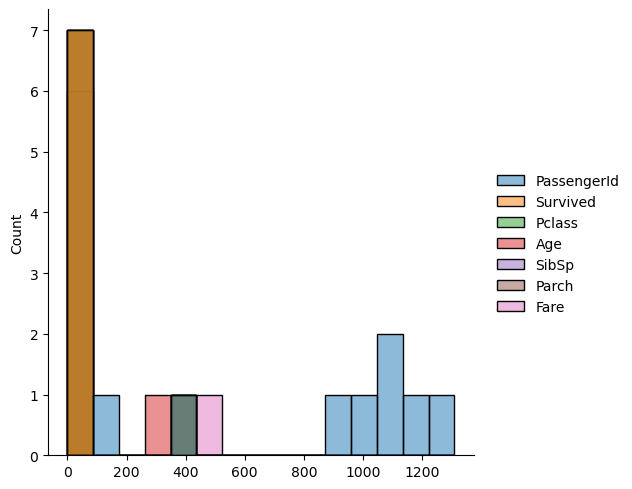

In [ ]:
# Get information about the dataset
print(df.describe())
sns.displot(df.describe())

In [ ]:
# Get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# To check missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##### There are three columns with missing values
They are as follows:
* Age
* Fare
* Cabin

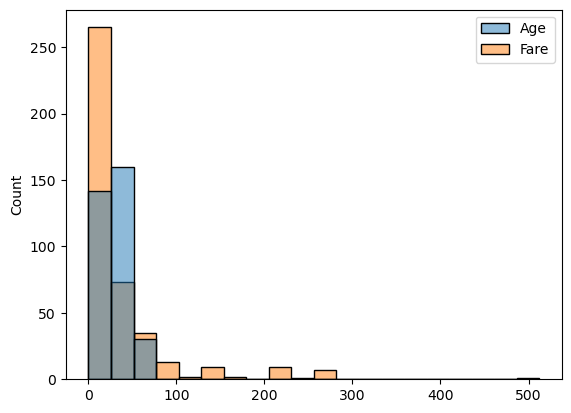

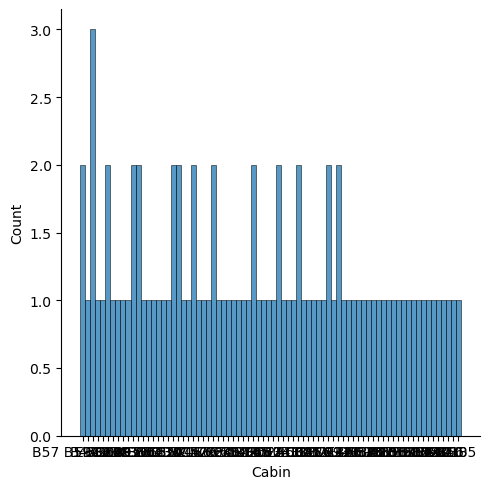

In [ ]:
# Visualizing the outliers of the missing numbers
mis_numbers = ['Age', 'Fare']
sns.histplot(df[mis_numbers], bins=20)
sns.displot(df['Cabin'])

In [ ]:
# Drop/delete the column Cabin coz it contains many missing numbers
data_Cabin = df.drop("Cabin",axis=1,inplace=True)

In [ ]:
# Column 'Fare' & 'Age' has missing values also, fill in with the mean value
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Age'] = df['Age'].fillna(df["Age"].mean())

In [ ]:
df.info() # Column Cabin is being deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


### Splitting the dataset in to X and Y

In [ ]:
y = df.iloc[:, 1].values
print(y, "\n", len(y))

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0] 
 418


In [ ]:
# Column "sex" is categorical so we need to encode it
# Encoding the column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']) # Male is encoded as 1 and female encoded as 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [ ]:
# Defining the features to be used in the training
# features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
X = df.iloc[:,[2,4,5,6,7,9]].values
print(X)

[[ 3.          1.         34.5         0.          0.          7.8292    ]
 [ 3.          0.         47.          1.          0.          7.        ]
 [ 2.          1.         62.          0.          0.          9.6875    ]
 ...
 [ 3.          1.         38.5         0.          0.          7.25      ]
 [ 3.          1.         30.27259036  0.          0.          8.05      ]
 [ 3.          1.         30.27259036  1.          1.         22.3583    ]]


In [ ]:
# Check the shape of X and Y
print("X_shape: ", X.shape)
print("y_shape: ", y.shape)

X_shape:  (418, 6)
y_shape:  (418,)


### Splitting the dataset into training and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Feature Scaling

In [ ]:
# We need to rescale the dataset to the same numerical value
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


### Using Naive-Bayes Classifier Algorithm

In [ ]:
# Import the necessary libraries
from sklearn.naive_bayes import GaussianNB # With gaussian method of naive-bayes
model = GaussianNB()
model = model.fit(X_test, y_test)

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1]


In [ ]:
# Check the accuracy of the prediction
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_pred, y_test)
print("confusion matrix:", cm, "\n")
print("accuracy_score:", ac)

confusion matrix: [[67  0]
 [ 0 38]] 

accuracy_score: 1.0


In [ ]:
from sklearn.metrics import mean_absolute_error as mae, classification_report
mae_score = mae(y_pred, y_test)
print(mae_score)

0.0


In [ ]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        38

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [ ]:
output = pd.DataFrame({'PassengerId':df.PassengerId[1:106], 'Survived':y_pred})
output.to_csv("Output(1).csv", index=False)
print("Download complete!")

Download complete!
